<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../Assets/ATLASOD.gif" style="width:50%"></a>
</CENTER>

<CENTER><h1>Análisis del decamiento del bosón “Higgs” a través del canal dileptónico</h1></CENTER>
<CENTER><h1>(Data real)</h1></CENTER>

El siguiente análisis buscará eventos en los que el bosón de Higgs decae a través del canal dileptónico y los comparará con los eventos de fondo WW

In [1]:
import ROOT

Welcome to ROOTaaS 6.06/08


In [2]:
from math import fabs
from math import pi

In [3]:
## o en las carpetas locales
rd = ROOT.TFile.Open("/home/student/DataMuons.root") #Datos "Signal"

In [4]:
c = ROOT.TCanvas("testCanvas","a first way to plot a variable",800,600)

In [6]:
t_rd = rd.Get("mini")

In [7]:
h_rd = ROOT.TH1F("variable_sig","Numero de Leptones",4,0,4)
h2_rd = ROOT.TH1F("variable2_sig","Numero de Jets",10,0,10)
h3_rd = ROOT.TH1F("variable3_sig","Valor de la Missing Et",20,0,200)
h4_rd = ROOT.TH1F("variable4_sig","Valor del Pt de los dos primeros leptones",20,0,200)
h5_rd = ROOT.TH1F("variable5_sig","Valor del DeltaPhi(lepton-lepton)",18,0,180)
h6_rd = ROOT.TH1F("variable6_sig","Valor del DeltaPhi(Missing Et-2 Leptones)",18,0,180) 

# Aplicamos el corte: "Número de leptones mayor a 1" y el corte:"Valor del DeltaPhi(Missing Et-2 Leptones) menor a 100°


In [12]:
cut_events = 0
total_events = 0
            
for event in t_rd:
    total_events += 1
    
    if t_rd.lep_n > 1:
        if fabs((t_rd.lep_phi[0] - t_rd.lep_phi[1])*180/pi) < 100:
                    
            leadLepton_rd  = ROOT.TLorentzVector()
            trailLepton_rd = ROOT.TLorentzVector()
                
            # Definimos un vector TLorentz para cada lepton
            leadLepton_rd.SetPtEtaPhiE(t_rd.lep_pt[0]/1000., t_rd.lep_eta[0], t_rd.lep_phi[0], t_rd.lep_E[0]/1000.)
            trailLepton_rd.SetPtEtaPhiE(t_rd.lep_pt[1]/1000., t_rd.lep_eta[1], t_rd.lep_phi[1], t_rd.lep_E[1]/1000.)
            # Siguiente línea: suma de los dos vectores TLorentz descritos  (dividimos por 1000 para obtener valores en GeV)
            l12_rd = leadLepton_rd + trailLepton_rd
        
            h_rd.Fill(t_rd.lep_n)
            h2_rd.Fill(t_rd.jet_n)
            h3_rd.Fill(t_rd.met_et/1000.) 
            h4_rd.Fill(l12_rd.Pt())
            h5_rd.Fill(fabs((t_rd.lep_phi[0] - t_rd.lep_phi[1])*180/pi))
            h6_rd.Fill(fabs(((t_rd.lep_phi[0] + t_rd.lep_phi[1])/2 - t_rd.met_phi)*180/pi)) 
            
            cut_events += 1
                
print "Done!"
print "Número de eventos totales =", total_events
print "Número de eventos luego del filtro =", cut_events

Done!
Número de eventos totales = 7028084
Número de eventos luego del filtro = 102511


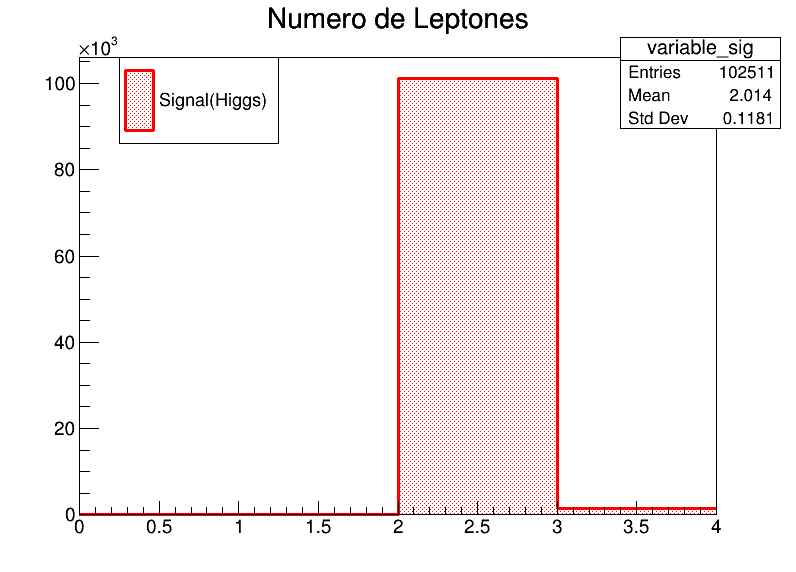

In [13]:
h_rd.SetFillStyle(3003) #estilo puntos equidistantes
h_rd.SetFillColor(2) #rojo

legend=ROOT.TLegend(0.15,0.75,0.35,0.9)   
#coordenadas del cuadro de leyenda (coord.vert.izq, coord.hor.abajo, coord.vert.der, coord.hor.arriba)
legend.AddEntry(h_rd,"Signal(Higgs)","f")

h_rd.SetLineColor(2) #rojo

h_rd.Draw()
legend.Draw()
c.Draw()

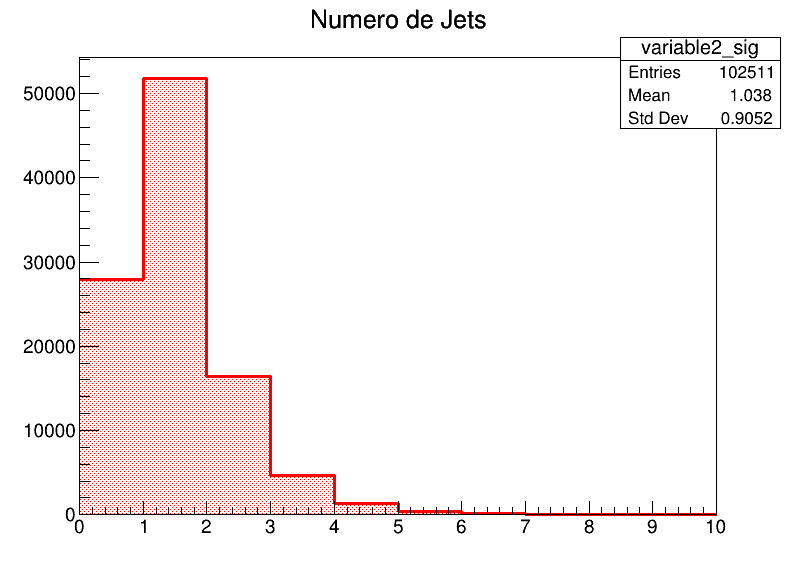

In [14]:
h2_rd.SetFillStyle(3003)
h2_rd.SetFillColor(2)

h2_rd.SetLineColor(2)

h2_rd.Draw()
c.Draw()


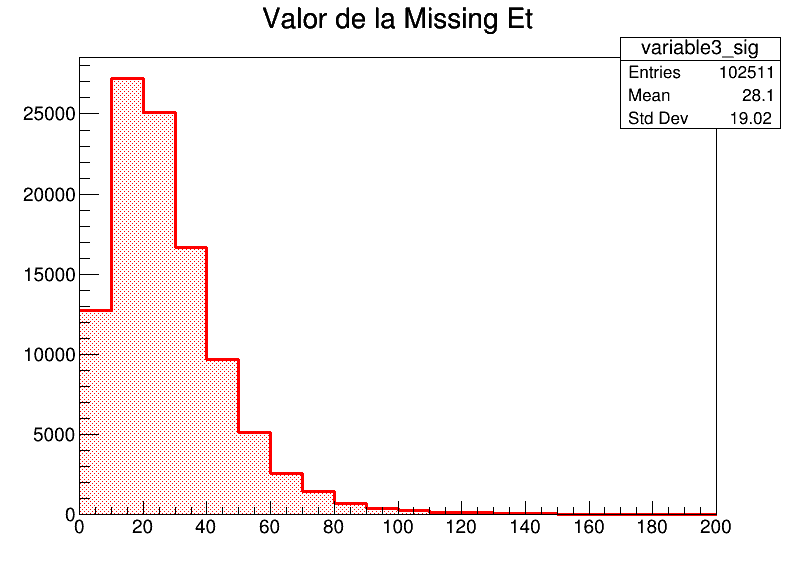

In [15]:
h3_rd.SetFillStyle(3003)
h3_rd.SetFillColor(2)

h3_rd.SetLineColor(2)

h3_rd.Draw()
c.Draw()

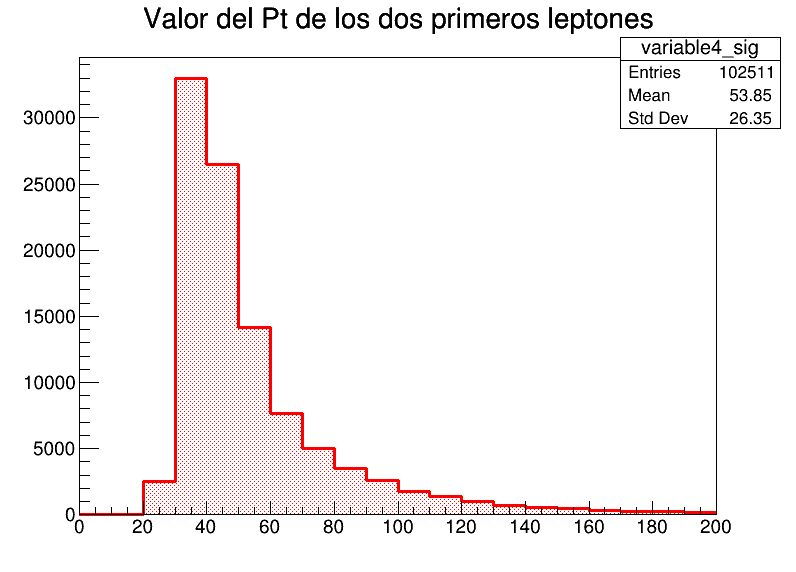

In [16]:
h4_rd.SetFillStyle(3003)
h4_rd.SetFillColor(2)

h4_rd.SetLineColor(2)

h4_rd.Draw()
c.Draw()

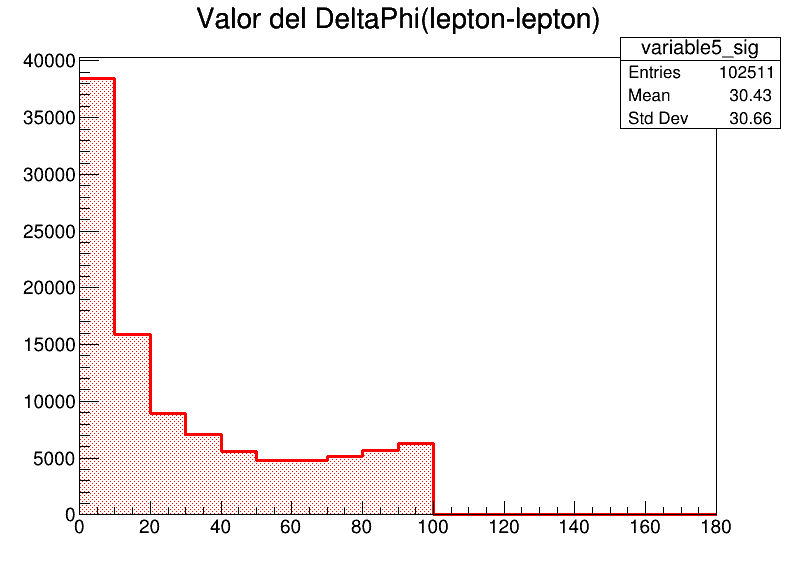

In [17]:
h5_rd.SetFillStyle(3003)
h5_rd.SetFillColor(2)

h5_rd.SetLineColor(2)

h5_rd.Draw()
c.Draw()

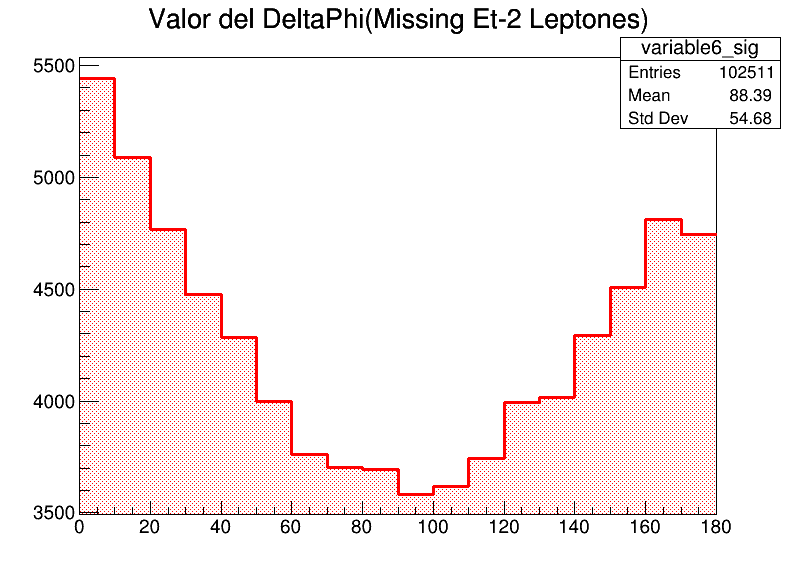

In [18]:
h6_rd.SetFillStyle(3003)
h6_rd.SetFillColor(2)

h6_rd.SetLineColor(2)

h6_rd.Draw()
c.Draw()

In [ ]:
#Para hacer los histogramas interactivos
#ROOT.enableJSVis()
#c.Draw()
#ROOT.disableJSVis() 